# **Série de Travaux Pratiques N° 4 : Regréssion Multiple et Regréssion Polynomiale**

# **Partie II : Regréssion Polynomiale**

- La régression multiple est comme la régression linéaire, mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

- L’ensemble de données ci-dessous contient des informations sur les voitures.
- Nous pouvons prédire les émissions de CO2 d’une voiture en fonction de la taille du moteur, mais avec la régression multiple, nous pouvons intégrer davantage de variables, comme le poids de la voiture, pour rendre la prédiction plus précise.

### **Question 1**

1)- Lisez le fichier "data.csv"renvoyez un objet DataFrame et afficher le dataset avec head()

In [2]:
#import library pandas qui utilse pour importer le database et manger le
import pandas as pd
#importer le database
df = pd.read_csv('data.csv');
#afficher le 5 premier ligne
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### **Question 2**

2)- Faites ensuite une dataframe des valeurs indépendantes (Volume et Wheight) et appelez cette variable X.

In [9]:
# poser les colone volume weight dans variable X
X = df[['Volume', 'Weight']]
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  36 non-null     int64
 1   Weight  36 non-null     int64
dtypes: int64(2)
memory usage: 708.0 bytes


,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140


### **Question 3**

3)- Mettez les valeurs dépendantes (CO2) dans une variable appelée y.






In [6]:
# poser les colone Co2 dans variable y
y = df['CO2']
y.head()

0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64

### **Question 4**

4)- À partir du module sklearn, utlisez la méthode LinearRegression() pour créer un objet de régression linéaire.

In [7]:
#importer les Model regression linear
from sklearn.linear_model import LinearRegression
Model = LinearRegression()

### **Question 5**

5)- Cet objet possède une méthode appelée fit() qui prend les valeurs indépendantes **X** et dépendantes **y** comme paramètres et remplit l'objet de régression avec des données décrivant la relation :


In [8]:
#trainer le model avec feuters X et labels y 
Model.fit(X,y)

LinearRegression()

### **Question 6**

6)- Nous disposons désormais d'un objet de régression prêt à prédire les valeurs de CO2 en fonction du poids et du volume d'une voiture. On veut prédire combien de grammes de CO2 est dégagés pour chaque kilomètre parcouru pour une voiture équipée d’un moteur de 1,3 litre (1300 ml) et pesant 2300 kg (utiliser la fonction predict).

In [14]:
#predict un test Volume 1300 et weight 2300
Model.predict([[1300,2300]])

C:\Users\ULTRAPC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([107.2087328])

### **Question 7**

7)- Le coefficient est un facteur qui décrit la relation avec une variable inconnue.

Exemple : si x est une variable, alors 2x vaut x deux fois. x est la variable inconnue et le chiffre 2 est le coefficient.

Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [20]:
# get weight and bias of model
Model.coef_ , Model.intercept_

(array([0.00780526, 0.00755095]), 79.69471929115939)

# **Partie II : Regréssion Polynomiale**

### **Question 1**

1- Importer les librairies : numpy, matplotlib, sklearn.

In [1]:
#importer les library , numpy pour (math,tableau) , matplotlib pour visual , sklearn pour machine learning functions
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.datasets import make_regression


### **Question 2**

2- Créer votre dataset en important la fonction datasets.make_regression et utilisez la pour générer un problème de régression aléatoire de 100 exemples avec une seule variable avec y=x^2

In [2]:
# make simples or dataset using make_regression of 100 samples with 1 features with noise
x, y = make_regression(n_samples=100, n_features=1, noise=10) 
y = y**2
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
x = poly_features.fit_transform(x)

### **Question 3**

3- Visualiser vos données en utilisant la fonction plt.scatter(x, y).

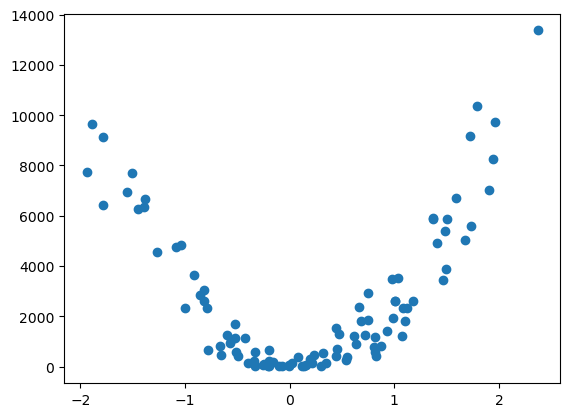

In [3]:
#visual dataset
plt.scatter(x[:,0], y) 

### **Question 4**

4- Définir votre modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [4]:
#import et config model
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=100, eta0=0.0001) 


### **Question 5**

5- Entraîner votre modèle en utilisant la méthode fit().

In [5]:
#train model
model.fit(x,y) 

C:\Users\ULTRAPC\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100)

### **Question 6**

6- Calculer la précision de votre modèle en utilisant la fonction score qui calcule le coefficient de détermination entre le modèle et les valeurs y de votre Dataset.

In [7]:
#check score of model
model.score(x,y)

0.10746522591609786

### **Question 7**

7- Faire de nouvelles prédictions avec la fonction predict() et tracer les résultats.

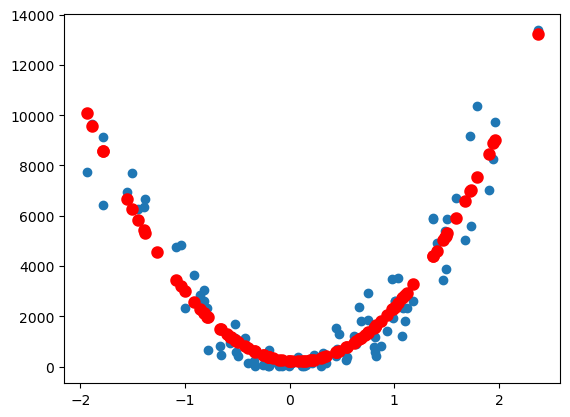

In [10]:
# visualer le dataset (real and predict)
plt.scatter(x[:,0], y) 
plt.scatter(x[:,0], model.predict(x), c='red', lw = 3)

### **Question 8**

8- Refaire le même travail en entraînant votre modèle sur 1000 itérations avec un Learning rate de 0.001.

C:\Users\ULTRAPC\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9112117598500792

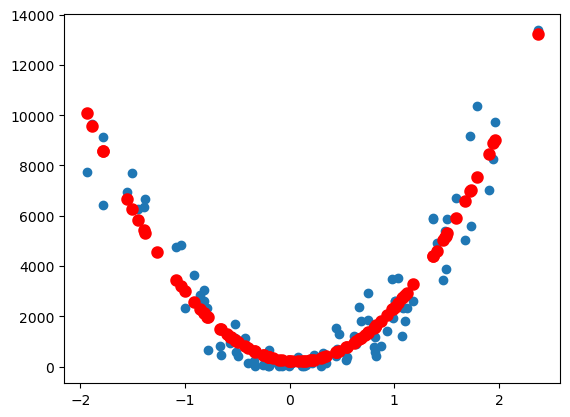

In [9]:
#reconfig les parametre de model avec nea
model = SGDRegressor(max_iter=1000, eta0=0.001) 
model.fit(x,y) 
plt.scatter(x[:,0], y) 
plt.scatter(x[:,0], model.predict(x), c='red', lw = 3)
model.score(x,y)